# Generazione di numeri casuali {#sec-rng}

In questo insegnamento vengono introdotti molti concetti tramite la simulazione. Pertanto deve essere ben chiaro come sia possibile generare numeri casuali da varie distribuzioni di probabilità. In questo capitolo esamineremo [NumPy](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng) dato che questo modulo offre generatori di numeri casuali per tutte le principali distribuzioni di probabilità.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import arviz as az
from scipy.constants import golden
import scipy.stats as stats

In [4]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
import arviz as az
az.style.use("arviz-darkgrid")

### Numeri casuali

Cosa intendiamo per numeri casuali? Sono sequenze di numeri generati secondo una distribuzione di probabilità specificata. Questa distribuzione definisce la probabilità con cui ciascun valore può essere estratto. Ad esempio, nella distribuzione uniforme, tutti i valori hanno la stessa probabilità di apparire. Un esempio concreto è il lancio di un dado perfetto: ogni faccia ha una probabilità su sei di uscire, rappresentando una distribuzione uniforme discreta.

Tuttavia, la casualità non si limita ai dadi o ai numeri interi. Possiamo generare numeri casuali che possono assumere qualsiasi valore all'interno di un intervallo, come ad esempio tra 0 e 1. Questi numeri sono detti uniformi, poiché ogni valore ha la stessa probabilità di essere estratto.

Ma la casualità può assumere molte altre forme. Possiamo generare numeri che seguono altre leggi di probabilità, come la distribuzione normale (a forma di campana), la distribuzione beta o la distribuzione gamma. La scelta della distribuzione dipende dal problema specifico che vogliamo affrontare.

Il computer, essendo una macchina che segue regole precise, non può generare numeri veramente casuali, ma può produrre sequenze di numeri che appaiono casuali a tutti gli effetti. Questi numeri sono chiamati pseudo-casuali.

Come fanno i computer a simulare la casualità? Utilizzano degli algoritmi, ovvero delle procedure ben precise, che a partire da un valore iniziale, chiamato "seed", generano una sequenza di numeri. Questo seed è spesso ottenuto da eventi esterni al computer, come ad esempio il tempo di sistema, rendendo così la sequenza generata diversa ad ogni esecuzione. Per molti scopi pratici, come le simulazioni statistiche, non è necessario distinguere tra numeri veramente casuali e pseudo-casuali.

## Generazione di Numeri Casuali

La generazione di numeri casuali (RNG) è il processo mediante il quale si estrae una sequenza di numeri che, in realtà, non sono completamente casuali per varie ragioni.

Essi vengono estratti da una distribuzione di probabilità, con la più comune che è la distribuzione uniforme nel dominio 0≤𝑥<1, ovvero numeri casuali compresi tra zero e uno.

Nella maggior parte delle applicazioni informatiche, comprese quelle utilizzate in questo insegnamento, i numeri casuali sono in realtà pseudocasuali. Questo significa che dipendono completamente da un valore iniziale chiamato "seed" e vengono generati da un algoritmo deterministico basato su quel seed. Questo diventa evidente quando notiamo che otteniamo sempre la stessa sequenza di numeri casuali quando utilizziamo lo stesso seme, sia su diverse macchine che in diverse ripetizioni sulla stessa macchina.

Per ottenere numeri veramente casuali sui nostri computer, sarebbe necessario acquisire dati casuali da una fonte esterna, come sequenze di tasti, movimenti del mouse, dati di rete, e così via. La necessità di numeri veramente casuali sorge principalmente in contesti legati alla sicurezza, come la crittografia. Tuttavia, per gli scopi della data science, i numeri pseudocasuali generati dal computer tramite algoritmi come quelli offerti da NumPy in Python sono sufficienti.

Il generatore `rng` fornito da NumPy offre una serie di metodi per generare numeri casuali estratti da diverse distribuzioni di probabilità. Oltre agli argomenti specifici della distribuzione, ciascun metodo accetta un argomento `size`, il cui valore predefinito è `None`. Se `size` è impostato su `None`, verrà generato e restituito un singolo valore casuale. Se, invece, `size` è un numero intero, verrà restituito un array 1-D contenente i valori generati.

## Distribuzione uniforme

Consideriamo la distribuzione uniforme: `rng.uniform([low, high, size])`. Genero un singolo valore:

Lo genero una seconda volta:

In [3]:
rng.uniform(0, 1, size=1)

array([0.77395605])

Genero 20 valori:

In [4]:
rng.uniform(0, 1, size=20)

array([0.43887844, 0.85859792, 0.69736803, 0.09417735, 0.97562235,
       0.7611397 , 0.78606431, 0.12811363, 0.45038594, 0.37079802,
       0.92676499, 0.64386512, 0.82276161, 0.4434142 , 0.22723872,
       0.55458479, 0.06381726, 0.82763117, 0.6316644 , 0.75808774])

Creo un istogramma.

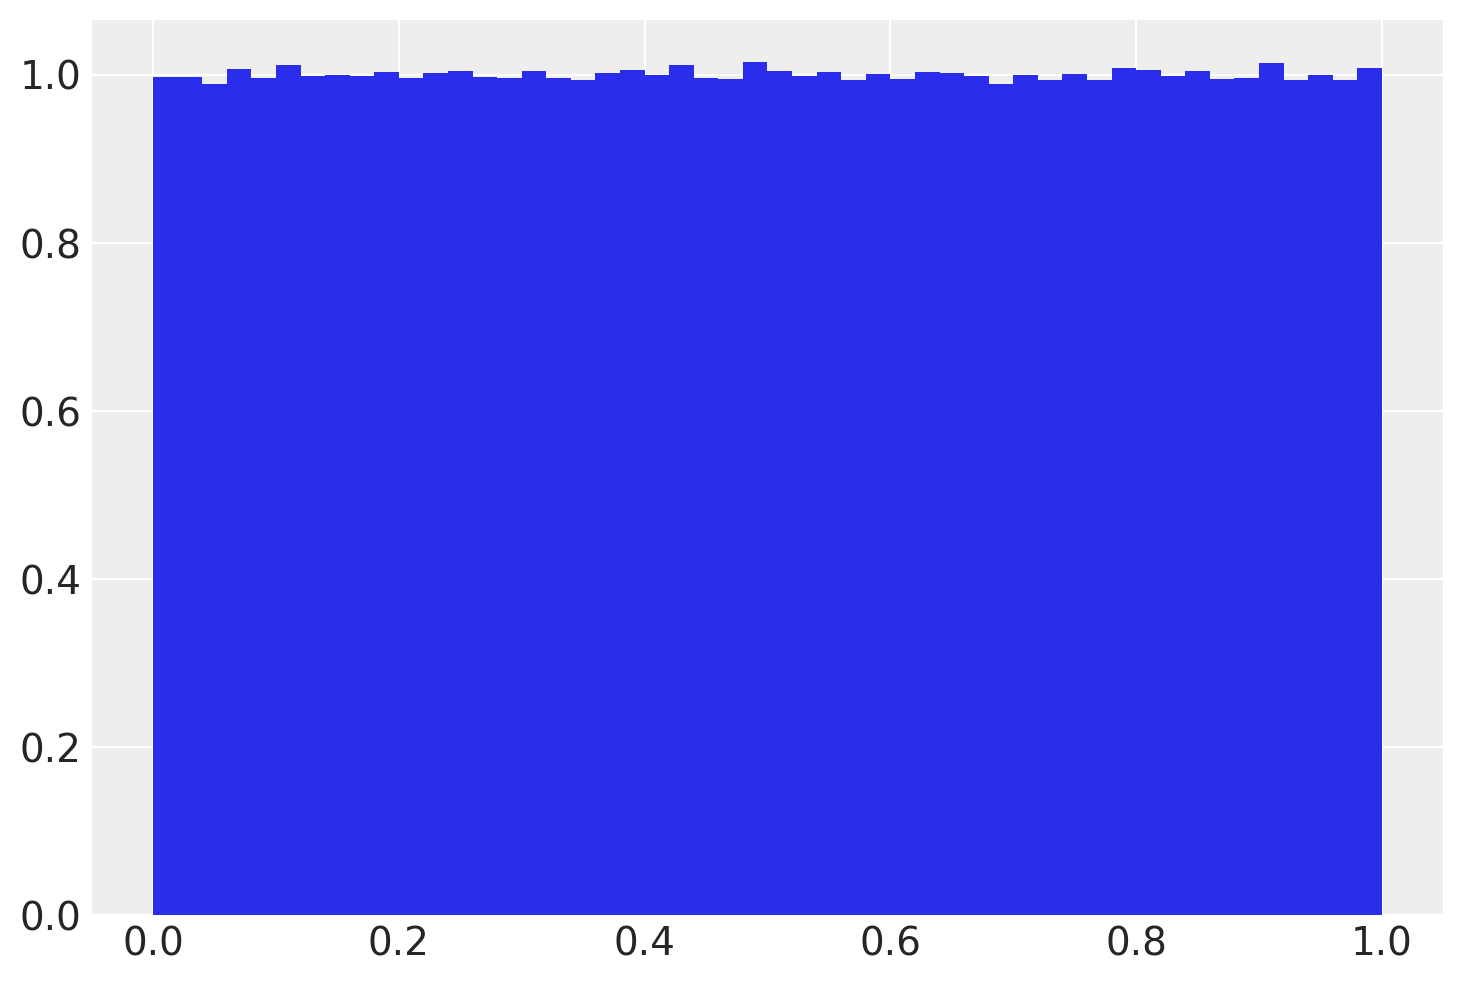

In [5]:
n_samples = 1000000
_ = plt.hist(rng.uniform(0, 1, size=n_samples), bins=50, density=True)

## Distribuzione normale

Estraiamo ora dei campioni casuali dalla distribuzione Gaussiana, `rng.normal([loc, scale, size])`. Per esempio, generiamo 10 valori dalla distribuzione $\mathcal{N}(\mu = 100, \sigma = 15)$:

In [6]:
x = rng.normal(loc=100, scale=15, size=10)
print(x)

[ 88.39130723 106.85972149 112.68284617  98.40757644  59.28402571
  83.63194152 127.29102032  91.32585446 109.21359401 103.23261596]


Ora generiamo un grande numero (1000000) di valori casuali dalla $\mathcal{N}(\mu = 100, \sigma = 15)$. Con questi valori creiamo un istogramma e a tale istogramma sovrapponiamo la funzione di densità $\mathcal{N}(\mu = 100, \sigma = 15)$. In questo modo possiamo accertarci che i numeri casuali  che abbiamo ottenuto si riferiscano veramente alla densità desiderata. Per trovare la densità della distribuzione normale, uso `norm.pdf` da `scipy.stats`. 

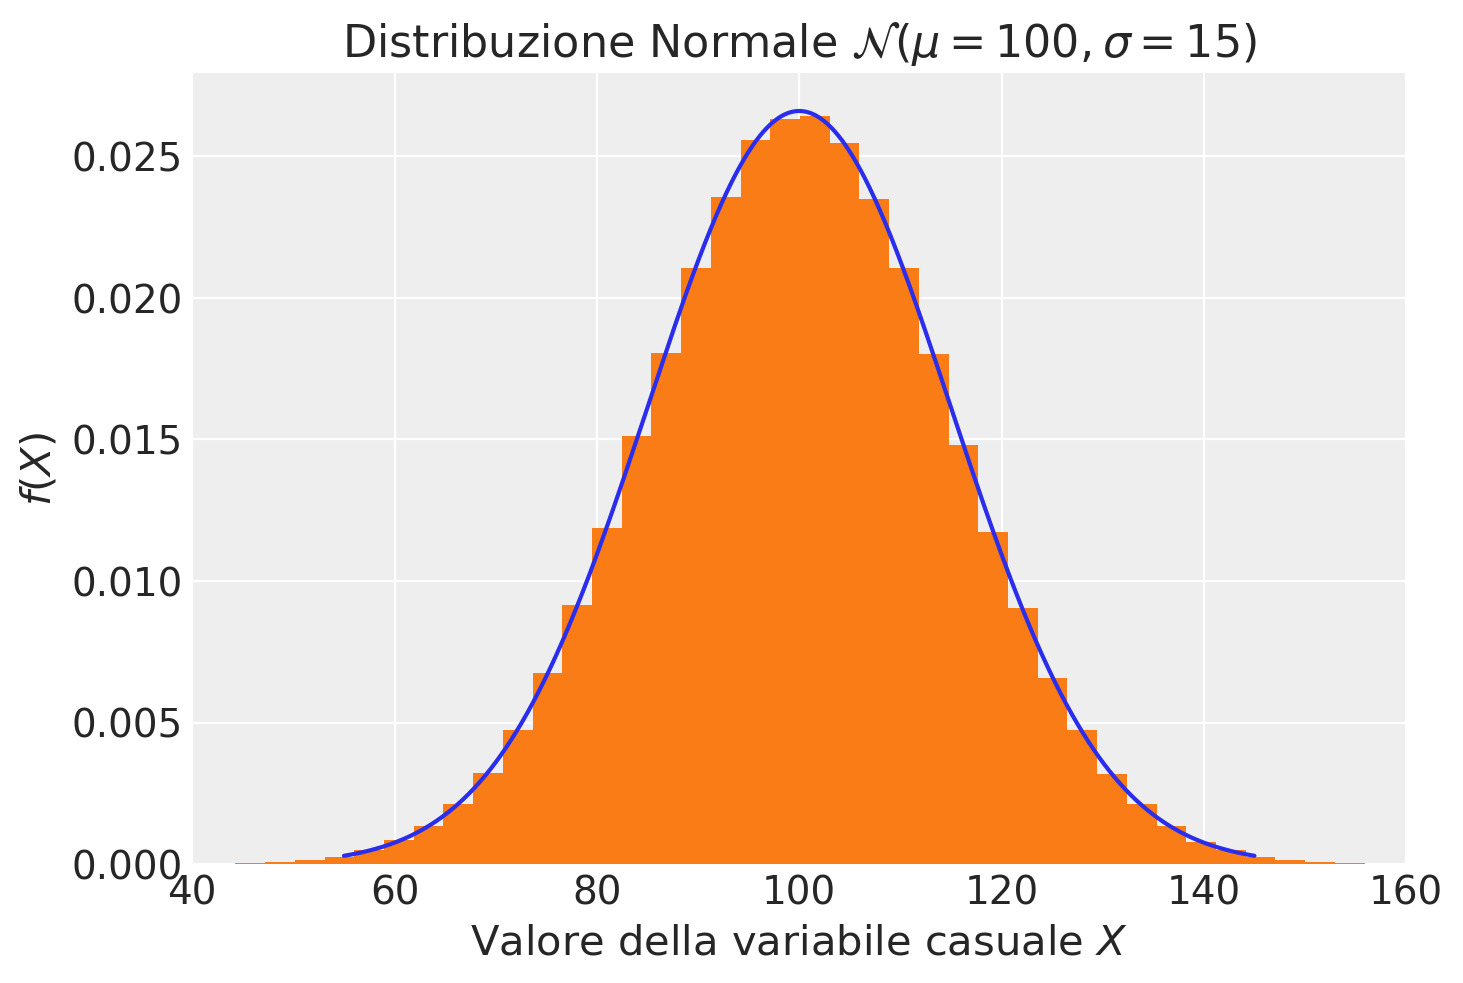

In [7]:
n_samples = 1000000
mu = 100
sigma = 15
# create x's
xs = np.linspace(55, 145, n_samples)
y_pdf = stats.norm.pdf(xs, mu, sigma)
# create random samples
samps = rng.normal(loc=mu, scale=sigma, size=n_samples)
# plot them
plt.plot(xs, y_pdf)
plt.hist(samps, bins=50, density=True)
plt.title("Distribuzione Normale $\mathcal{N}(\mu=100, \sigma=15)$")
plt.ylabel("$f(X)$")
plt.xlabel("Valore della variabile casuale $X$")
plt.xlim(40, 160);

La stessa procedura può essere usata per tutte le [distribuzioni](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng) implementate da NumPy. Esaminiamo alcuni esempi qui sotto.

## Distribuzione Beta

Per estrarre dei campioni casuali dalla distribuzione Beta usiamo il generatore `rng.beta(a, b[, size])`; per la densità Beta usiamo `stats.beta.pdf(x, a, b)`.

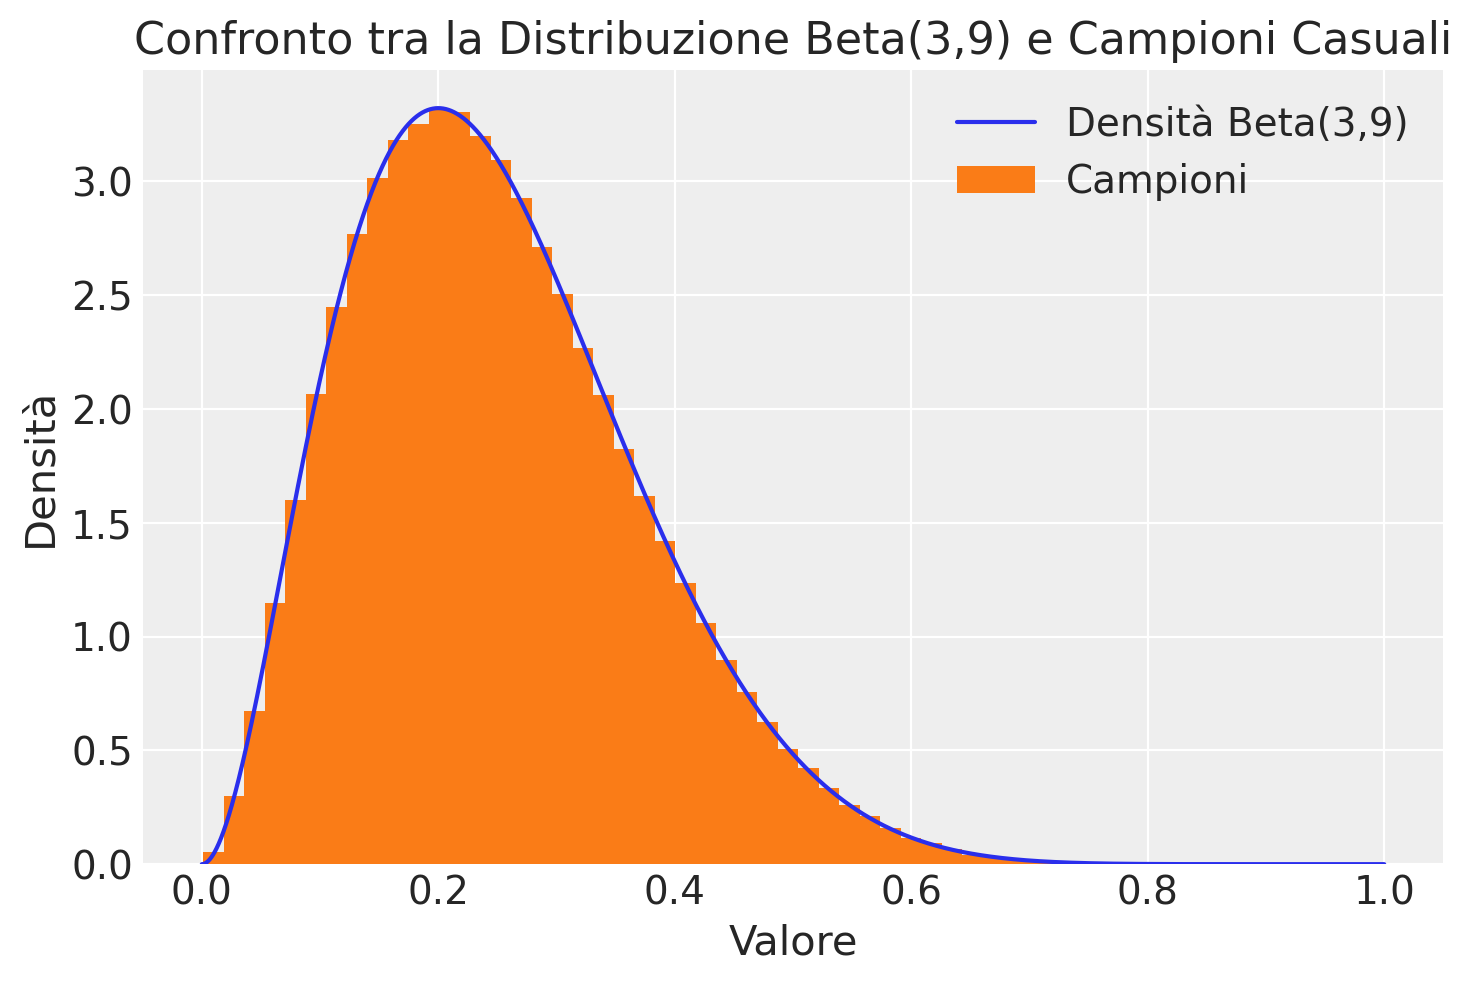

In [8]:
# Definisci il numero di campioni
n_samples = 1000000
a = 3
b = 9

# Crea un array di valori x
xs = np.linspace(0, 1, n_samples)

# Calcola la densità di probabilità (PDF) della distribuzione Beta
y_pdf = stats.beta.pdf(xs, a, b)

# Genera i campioni casuali
samps = rng.beta(a, b, size=n_samples)

# Traccia il grafico
plt.plot(xs, y_pdf, label="Densità Beta(3,9)")
plt.hist(samps, bins=50, density=True, label="Campioni")
plt.title("Confronto tra la Distribuzione Beta(3,9) e Campioni Casuali")
plt.ylabel("Densità")
plt.xlabel("Valore")
_ = plt.legend()

## Distribuzione binomiale

Per estrarre dei campioni casuali dalla distribuzione Binomiale usiamo `rng.binomial(n, p[, size])`; per la distribuzione di massa Binomiale usiamo `stats.binom.pmf(r, n, p)`.

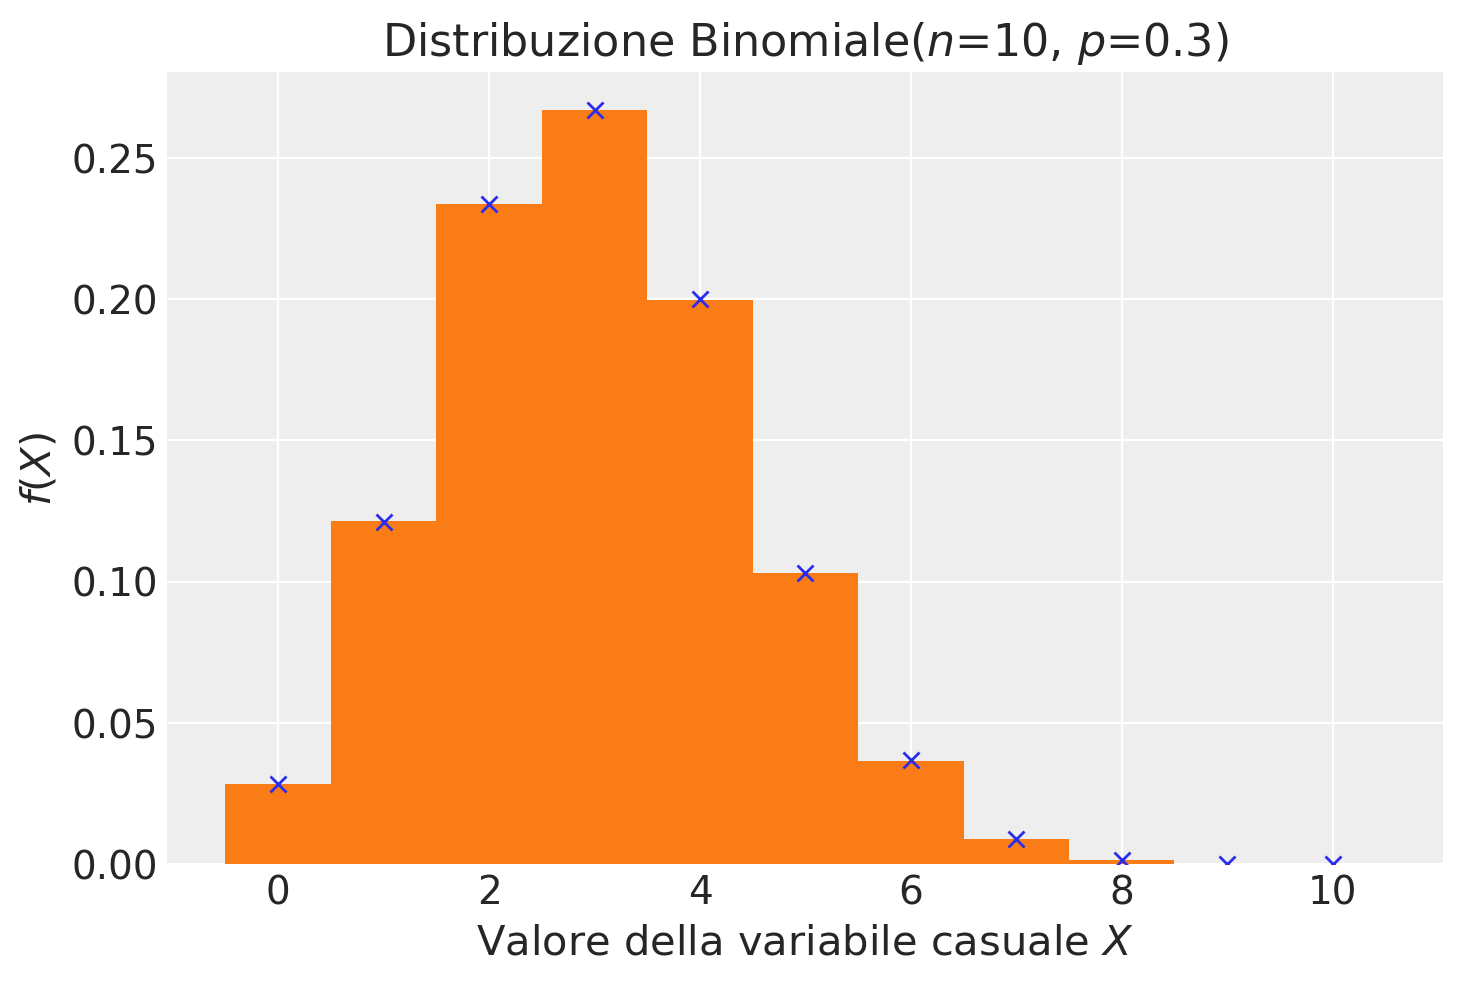

In [9]:
n_samples = 1000000

n = 10
p = 0.3
# create r values
r_values = list(range(n + 1))
# pmf
y_pmf = [stats.binom.pmf(r, n, p) for r in r_values]
# create random samples
r_samps = rng.binomial(n=n, p=p, size=n_samples)
plt.plot(r_values, y_pmf, "x")
plt.hist(r_samps, bins=np.arange(-0.5, 11.5, 1), density=True)
plt.title("Distribuzione Binomiale($n$=10, $p$=0.3)")
plt.ylabel("$f(X)$")
plt.xlabel("Valore della variabile casuale $X$");

## Distribuzione $t$ di Student

Per estrarre dei campioni casuali dalla distribuzione $t$ di Student uso il generatore `rng` con `standard_t(df, size=None)`; per la densità $t$ di Student uso `t.pdf` da `scipy.stats`.

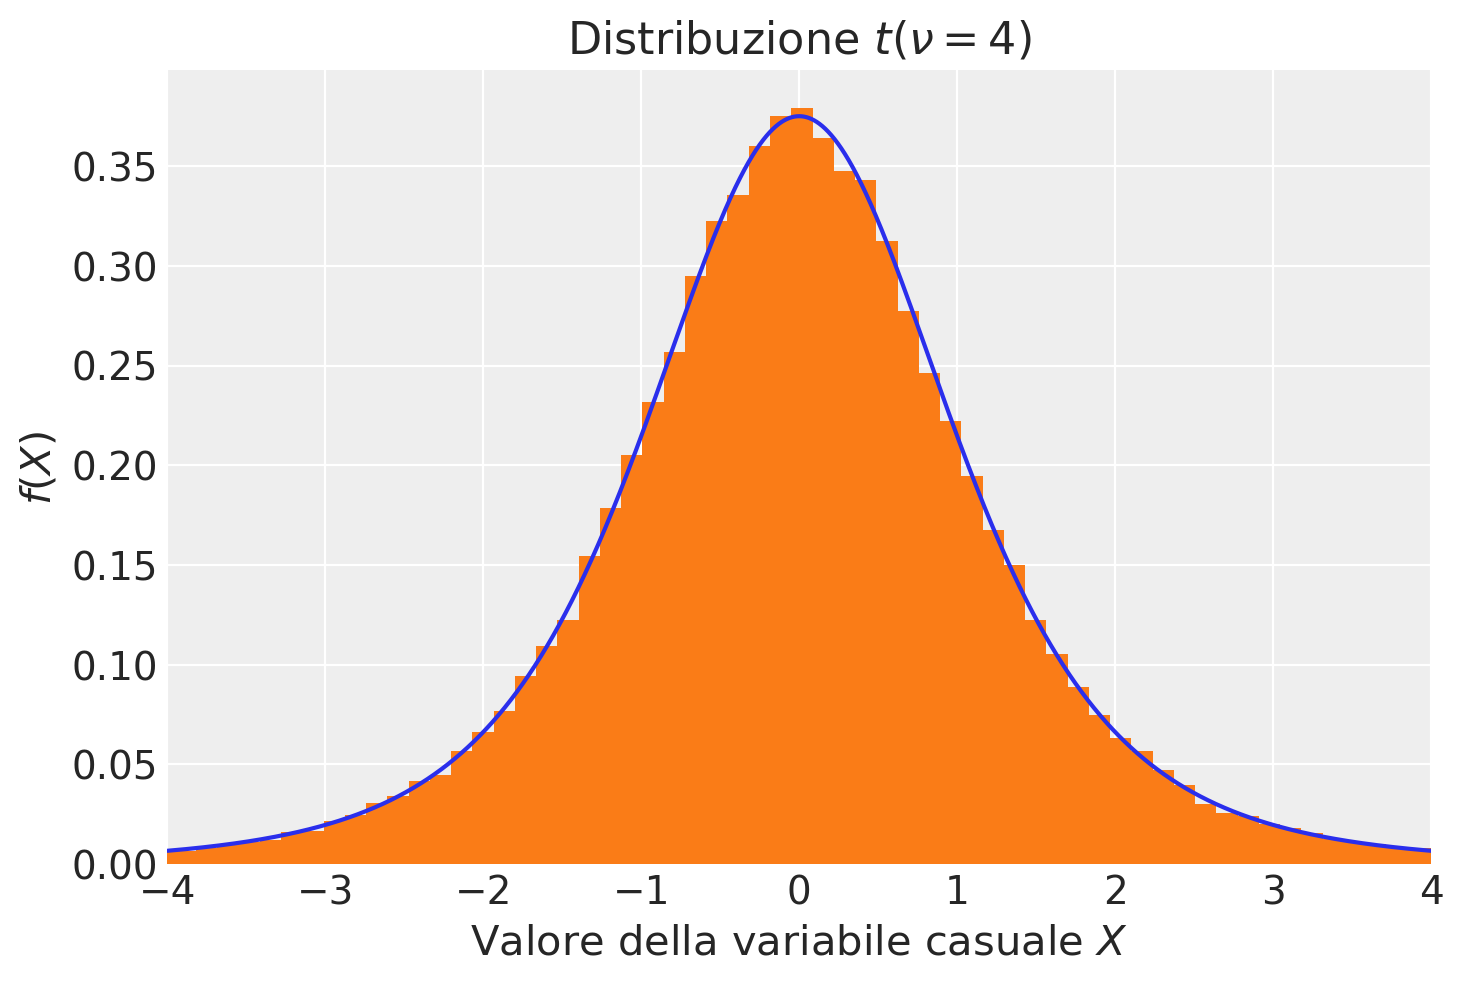

In [10]:
n_samples = 100000
df = 4
# create x's
xs = np.linspace(-4, 4, n_samples)
y_pdf = stats.t.pdf(xs, df=df)
# create random samples
samps = rng.standard_t(df=df, size=n_samples)
# plot them
fig, ax = plt.subplots()
plt.plot(xs, y_pdf)
plt.hist(samps, bins=400, density=True)
plt.title("Distribuzione $t(\\nu=4)$")
plt.ylabel("$f(X)$")
plt.xlabel("Valore della variabile casuale $X$")
plt.xlim(-4, 4);

## Distribuzione arbitraria di una variabile casuale distreta

Con la funzione `random.choices` è possible specificare i valori di una variabile casuale discreta con una distribuzione di massa di probabilità arbitraria. 

In [11]:
# Define the set of values
x_rv = [1, 2, 3, 4]
# Define the weights for each value
weights = [0.1, 0.1, 0.3, 0.5]

x_sample = rng.choice(x_rv, size=100, p=weights)
print(f"Random Sample: {x_sample}")

Random Sample: [1 1 4 3 1 4 1 4 3 3 4 4 1 4 4 4 4 2 4 2 1 4 4 2 1 3 2 4 1 4 4 3 4 2 4 4 1
 4 3 4 4 4 4 3 1 4 3 3 2 4 3 4 4 3 3 4 4 1 3 4 4 4 3 2 1 4 4 4 4 4 3 4 3 2
 3 4 4 3 3 4 4 3 4 2 4 3 4 3 1 2 4 4 1 1 4 3 1 4 4 4]


Nell'esempio, i pesi `weights` indicano che, nella distribuzione, il valore `4` è presente con una frequenza di cinque volte maggiore dei valori `1` e `2`. 

Se aggiungiamo l'argomento `k` possiamo definire i pesi (indirettamente, le probabilità) dei diversi valori della variabile casuale che sono stati specificati. Nell'esempio, i pesi `[1, 1, 3, 6]` indicano che, nella distribuzione, il valore `4` è presente con una frequenza di sei volte maggiore dei valori `1` e `2`. 

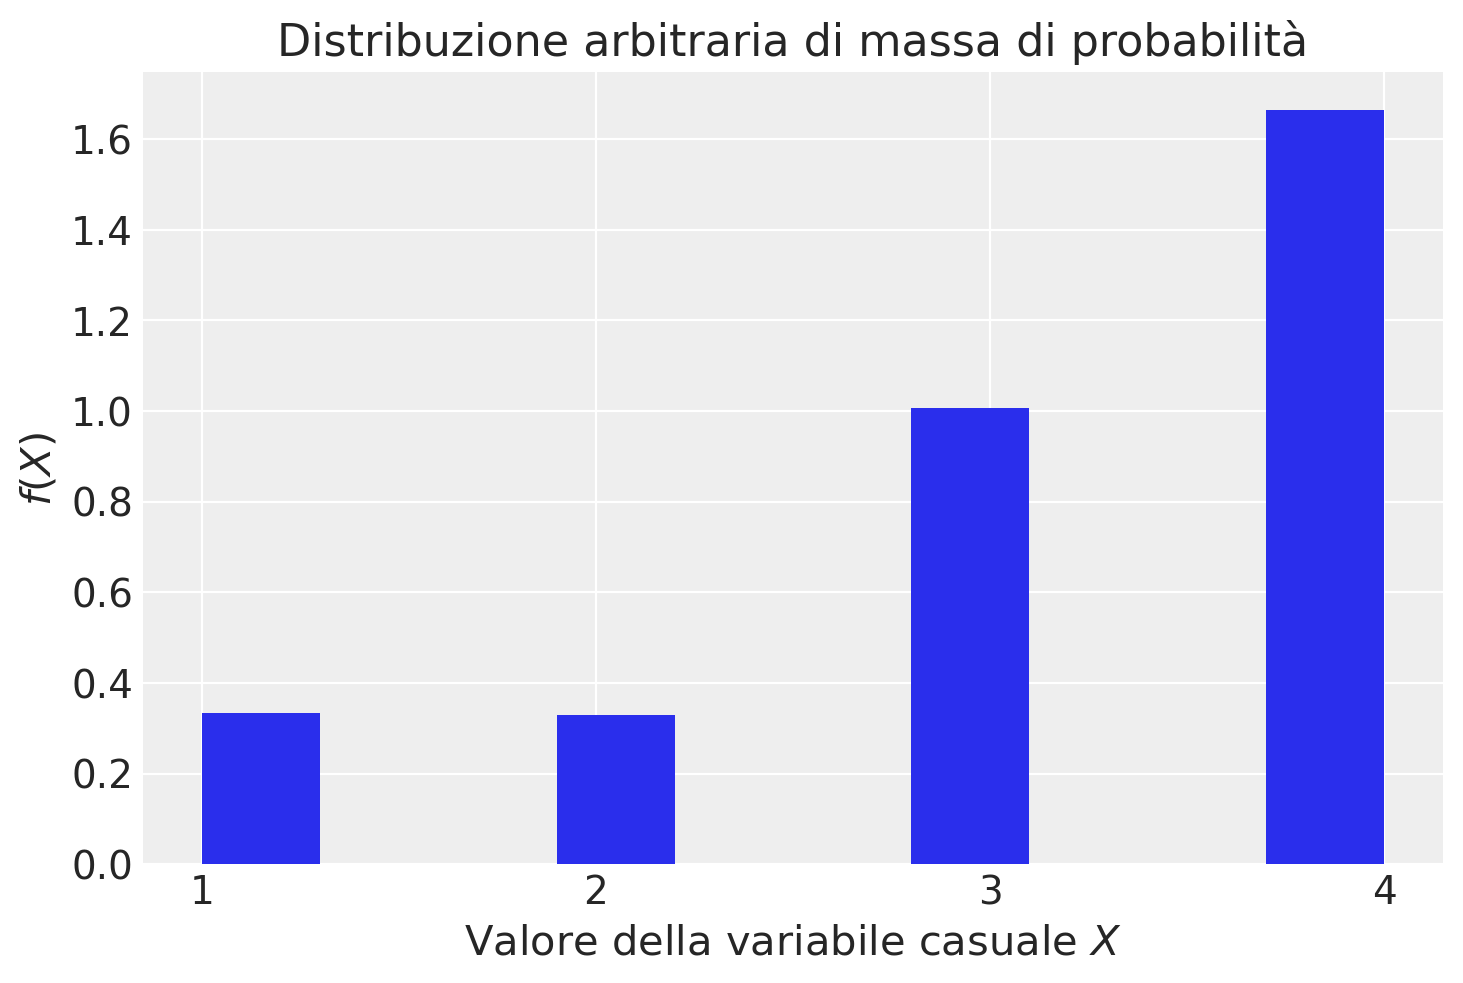

In [12]:
n_samples = 100000
x = rng.choice(x_rv, size=n_samples, p=weights)
bins = plt.hist(x, density=True)
plt.title("Distribuzione arbitraria di massa di probabilità")
plt.ylabel("$f(X)$")
plt.xlabel("Valore della variabile casuale $X$")
plt.xticks(x_rv);

In [24]:
rng.binomial(10, .1, size=4)

array([3, 0, 3, 1])

## La Tecnica dell'Inversione

La tecnica dell'inversione per la simulazione, introdotta nel 1947 da John Von Neumann [@roger1987stan], permette di generare campioni casuali da una distribuzione data sfruttando una variabile casuale uniforme. Questo metodo consente di trasformare una variabile casuale uniforme in una variabile casuale con la distribuzione desiderata, permettendo così di ottenere un campione casuale da qualsiasi distribuzione specifica a partire da un campione di variabili casuali uniformi.

### Intuizione di Base

Immaginiamo di avere una variabile casuale $X$ con una funzione di distribuzione cumulativa $F(x)$, che è una funzione che mappa i valori di $X$ nell'intervallo $[0, 1]$. La tecnica dell'inversione sfrutta il fatto che possiamo invertire questa mappatura per ottenere i valori di $X$ a partire da una variabile casuale uniforme $U$ su $[0, 1]$.

#### Passi Fondamentali:

1. Si genera una variabile casuale $U$ che è uniformemente distribuita nell'intervallo $[0, 1]$.
2. Si applica l'inversa della funzione di distribuzione cumulativa $F^{-1}(u)$ per ottenere il valore corrispondente di $X$.

Vediamo come implementare questa tecnica utilizzando una distribuzione Gaussiana (Normale) con media $\mu$ e deviazione standard $\sigma$.

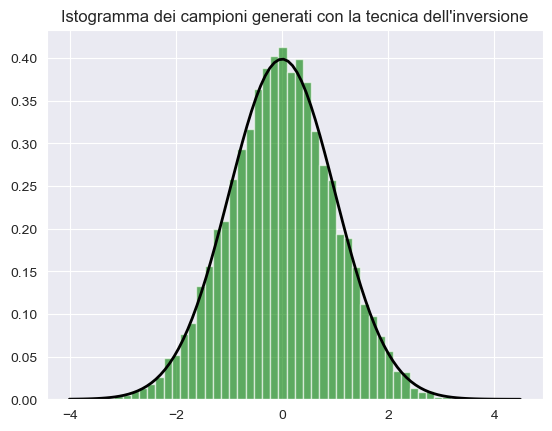

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parametri della distribuzione normale
mu = 0    # Media
sigma = 1 # Deviazione standard

# Generazione di 10000 variabili casuali uniformi
u = np.random.uniform(0, 1, 10000)

# Applicazione dell'inversa della funzione di distribuzione cumulativa normale
x = stats.norm.ppf(u, loc=mu, scale=sigma)

# Visualizzazione dell'istogramma dei campioni generati
plt.hist(x, bins=50, density=True, alpha=0.6, color='g')

# Sovrapposizione della funzione di densità di probabilità teorica
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
title = "Istogramma dei campioni generati con la tecnica dell'inversione"
plt.title(title)
plt.show()

Questo esempio illustra l'utilizzo della tecnica dell'inversione per generare campioni da una distribuzione normale utilizzando variabili casuali uniformi. Il processo è suddiviso in quattro passaggi:

1. Definizione della media `μ` e della deviazione standard `σ` della distribuzione normale desiderata.
2. Generazione di 10.000 numeri casuali uniformemente distribuiti nell'intervallo `[0, 1]`.
3. Applicazione dell'inversa della funzione di distribuzione cumulativa normale (tramite `stats.norm.ppf`) per trasformare i numeri casuali uniformi in campioni dalla distribuzione normale.
4. Creazione di un istogramma dei campioni generati e confronto con la funzione di densità di probabilità teorica della distribuzione normale.

Questa tecnica dimostra come sia possibile generare campioni da una distribuzione specifica a partire da variabili casuali uniformi. La stessa metodologia può essere applicata ad altre distribuzioni, semplicemente modificando la funzione di distribuzione cumulativa e la sua inversa.

Sebbene siano disponibili funzioni di alto livello, come `np.random.normal()` in NumPy, che ottengono lo stesso risultato in modo più semplice (si veda sotto), la tecnica dell'inversione fornisce una comprensione più approfondita del processo matematico sottostante. Questa conoscenza può essere utile per estendere il metodo ad altre distribuzioni non supportate direttamente dalle librerie esistenti.

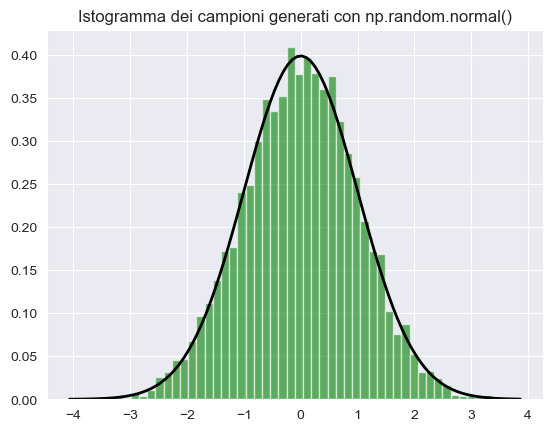

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generazione di 10000 numeri casuali da una distribuzione normale
mu = 0    # Media
sigma = 1 # Deviazione standard
samples = np.random.normal(mu, sigma, 10000)


# Visualizzazione dell'istogramma dei campioni generati
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g')

# Sovrapposizione della funzione di densità di probabilità teorica
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = (1/(np.sqrt(2*np.pi*sigma**2))) * np.exp(-(x-mu)**2/(2*sigma**2))
plt.plot(x, p, 'k', linewidth=2)
title = "Istogramma dei campioni generati con np.random.normal()"
plt.title(title)
plt.show()

## Commenti e Considerazioni Finali

In questo capitolo, abbiamo esaminato l'utilizzo della funzione `rng = np.random.default_rng()` per generare un campione di numeri pseudo-casuali da una distribuzione. Dopo aver inizializzato `rng` con `rng = np.random.default_rng(RANDOM_SEED)`, possiamo generare campioni casuali da diverse distribuzioni di massa e di densità di probabilità:

- Distribuzione uniforme: `rng.uniform(min, max, size)`
- Distribuzione normale: `rng.normal(loc, scale, size)`
- Distribuzione t di Student: `rng.standard_t(df, size)`
- Distribuzione beta: `rng.beta(alpha, beta, size)`
- Distribuzione binomiale: `rng.binomial(n, p, size)`

Nei capitoli precedenti, nello specifico nei notebook {ref}`discr_distr_notebook` e {ref}`cont-rv-distr-notebook`, abbiamo invece approfondito l'utilizzo di varie funzioni della libreria `scipy.stats` per manipolare le distribuzioni di probabilità. In particolare, abbiamo illustrato come sia possibile utilizzare:

- `.pdf` per ottenere i valori della funzione di densità di probabilità o `.pmf` per ottenere i valori della distribuzione di massa di probabilità.
- `.ppf` per calcolare i quantili della distribuzione.
- `.cdf` per calcolare la probabilità associata a un valore specifico. Nel caso di una variabile casuale continua, questo corrisponde al valore della funzione di ripartizione, che rappresenta l'area sotto la curva di densità nella coda sinistra. Nel caso di una variabile casuale discreta, corrisponde alla somma delle probabilità dalla distribuzione di massa di probabilità dal valore minimo fino al valore specificato (incluso).